In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [11]:
#Load the Dataset 
#Load file from my local computer - path to your local file
data = pd.read_csv("C:\\Users\\hp\Downloads\\Unicorn_Companies.csv")
         

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [12]:
#Exploration Data Analysis
#To gain a better understanding of the dataset 

data.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [13]:
data.info()
# It appears all the data types are object (string) except Year Founded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [15]:
data.shape

#Unicorn Companies dataset has 1074 rows and 10 columns

(1074, 10)

In [16]:
data.size

##Unicorn Companies dataset has 10740 data values

10740

In [19]:
#Descriptive Statistics

data.describe()

#the describe method only worked on the Year Founded Column because it is the only column with Int 64 Dtype

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


The minimum value in the Year Founded column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.

The maximum value in the Year Founded column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

Convert the Date Joined column to datetime

Use pd.to_datetime() to convert the "Date Joined" column to datetime.
Update the column with the converted values.
Use .info() to confirm that the update actually took place

You can use the to_datetime() function from the pandas library. This splits each value into year, month, and date components. This is an important step in data cleaning, as it makes the data in this column easier to use in tasks you may encounter. To name a few examples, you may need to compare "date joined" between companies or determine how long it took a company to become a unicorn. Having "date joined" in datetime form would help you complete such tasks.

In [21]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


The data type of "Date Joined" has changed to datetime64[ns]

Create a Year Joined column

It is common to encounter situations where you will need to compare the year joined with the year founded. The Date Joined column does not just have year—it has the year, month, and date. Extract the year component from the Date Joined column and add those year components into a new column to keep track of each company's year joined.

In [23]:
#Create a new column named 'Year Joined' and extract the year component from the 'Date Joined' column. 
data['Year Joined'] = data['Date Joined'].dt.year

data.head(10)

#A new column Year Joined has been created 

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019


## Results and Evaluation


Take a sample of the data¶
It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. But you may encounter scenarios in the future where you will need to take a sample of the data due to time and resource limitations. For the purpose of developing your skills around sampling, take a sample of the data and work with that sample for the next steps of analysis you want to conduct. Use the sample() function for this task.

Use sample() with the n parameter set to 50 to randomly sample 50 unicorn companies from the data. Be sure to specify the random_state parameter to ensure reproducibility of your work. Save the result to a variable called companies_sampled.

In [24]:
# Sample the data

sampled_data = data.sample(n = 50, random_state = 42)

## Visualizations

Visualize the time it took companies to reach unicorn status

Visualize the longest time it took companies to reach unicorn status for each industry represented in the sample. To create a bar plot to visualize this, use the bar() function from the matplotlib.pyplot module. You'll first need to prepare the data.

In [26]:
#Prepare the data 

# Create new `years_till_unicorn` column 
sampled_data["years_till_unicorn"] = sampled_data["Year Joined"] - sampled_data["Year Founded"]



# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (sampled_data[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


Now, Create Bar Plot.

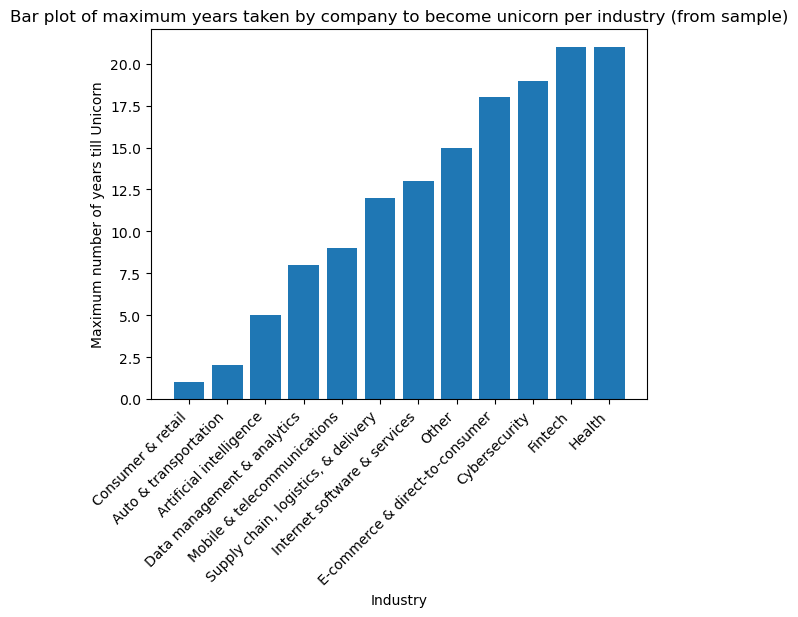

In [28]:
# Create bar plot
# with Industry column as the categories of the bars
# and the difference in years between Year Joined column and Year Founded column as the heights of the bars

plt.bar(grouped.index, grouped["years_till_unicorn"])

# grouped.index is likely the x-axis data for the bar plot. It refers to the index of a Pandas DataFrame or Series (grouped) that contains the data to be plotted.

# Set title

plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")

# Set x-axis label

plt.xlabel("Industry")

# Set y-axis label

plt.ylabel("Maximum number of years till Unicorn")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  

### YOUR CODE HERE ###

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot

plt.show()

Visualize the maximum unicorn company valuation per industry

Visualize unicorn companies' maximum valuation for each industry represented in the sample. To create a bar plot to visualize this, use the bar() function from the matplotlib.pyplot module. Before plotting, create a new column that represents the companies' valuations as numbers (instead of strings, as they're currently represented). Then, use this new column to plot your data.

In [29]:
# Create a column representing company valuation as numeric data

# Create new column
sampled_data['valuation_billions'] = sampled_data['Valuation']
# Remove the '$' from each value
sampled_data['valuation_billions'] = sampled_data['valuation_billions'].str.replace('$', '')
# Remove the 'B' from each value
sampled_data['valuation_billions'] = sampled_data['valuation_billions'].str.replace('B', '')
# Convert column to type int
sampled_data['valuation_billions'] = sampled_data['valuation_billions'].astype('int')

sampled_data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_6780\3063084852.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sampled_data['valuation_billions'] = sampled_data['valuation_billions'].str.replace('$', '')


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


In [31]:
# Prepare data for modeling
grouped = (sampled_data[["Industry", "valuation_billions"]].groupby("Industry").max().sort_values(by="valuation_billions"))
grouped

,valuation_billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


Now, Create Bar Plot

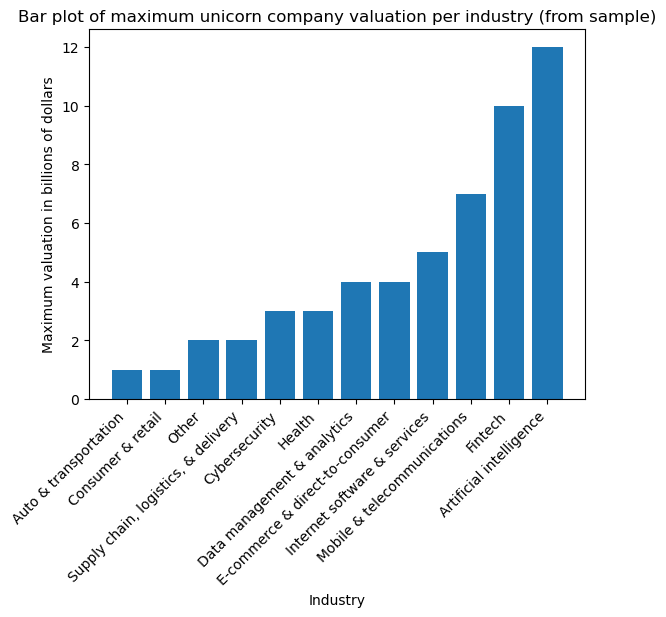

In [32]:
# Create bar plot
# with Industry column as the categories of the bars
# and new valuation column as the heights of the bars

plt.bar(grouped.index, grouped["valuation_billions"])

# Set title

plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")

# Set x-axis label

plt.xlabel("Industry")

# Set y-axis label

plt.ylabel("Maximum valuation in billions of dollars")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot

plt.show()

#### What findings would you share with others?

There are 1074 unicorn companies represented in this dataset.

Some companies took longer to reach unicorn status but have accrued high valuation as of March 2022. 

Companies could take longer to achieve unicorn status for a number of reasons, including requiring more funding or taking longer to develop a business model.


#### What recommendations would you share with stakeholders based on these findings?

It may be helpful to focus more on industry specifics. Next steps to consider:

Identify the main industries that the investing firm is interested in investing in.

Select a subset of this data that includes only companies in those industries.

Analyze that subset more closely. Determine which companies have higher valuation but do not have as many investors currently. They may be good candidates to consider investing in.




#### References

Bhat, M.A. (2022, March). [*Unicorn_Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies).